# **Taller 2b**
## **Fecha:** 15/07/2025
## **Nombres:**  Joseph Jimenez

Grafique la trayectoria de los siguientes sistemas de ecuaciones:
1. Gauss Jacobi
 
 x1+x2=7

 −2x1+5x2=0

 X0=(0,0)
 
 X0=(7,4)

2. Gauss Seidel
 
 x1+x2=6
 −2x1+x2=0

Prueba 3 posiciones iniciales, encuentre una en la que diverge el sistema. 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
--- Gauss-Jacobi ---
[07-15 17:31:33][INFO] i= 0 x: [[0. 0.]]
[07-15 17:31:33][INFO] i= 1 x: [[7. 0.]]
[07-15 17:31:33][INFO] i= 2 x: [[7.  2.8]]
[07-15 17:31:33][INFO] i= 3 x: [[4.2 2.8]]
[07-15 17:31:33][INFO] i= 4 x: [[4.2  1.68]]
[07-15 17:31:33][INFO] i= 5 x: [[5.32 1.68]]
[07-15 17:31:33][INFO] i= 6 x: [[5.32  2.128]]
[07-15 17:31:33][INFO] i= 7 x: [[4.872 2.128]]
[07-15 17:31:33][INFO] i= 8 x: [[4.872  1.9488]]
[07-15 17:31:33][INFO] i= 9 x: [[5.0512 1.9488]]
[07-15 17:31:33][INFO] i= 10 x: [[5.0512  2.02048]]
[07-15 17:31:33][INFO] i= 11 x: [[4.97952 2.02048]]
[07-15 17:31:33][INFO] i= 12 x: [[4.97952  1.991808]]
[07-15 17:31:33][INFO] i= 13 x: [[5.008192 1.991808]]
[07-15 17:31:33][INFO] i= 14 x: [[5.008192  2.0032768]]
[07-15 17:31:33][INFO] i= 15 x: [[4.9967232 2.0032768]]
[07-15 17:31:33][INFO] i= 16 x: [[4.9967232  1.99868928]]
[07-15 17:31:33][INFO] i= 17 x: [[5.00131072 1.99868928]]
[

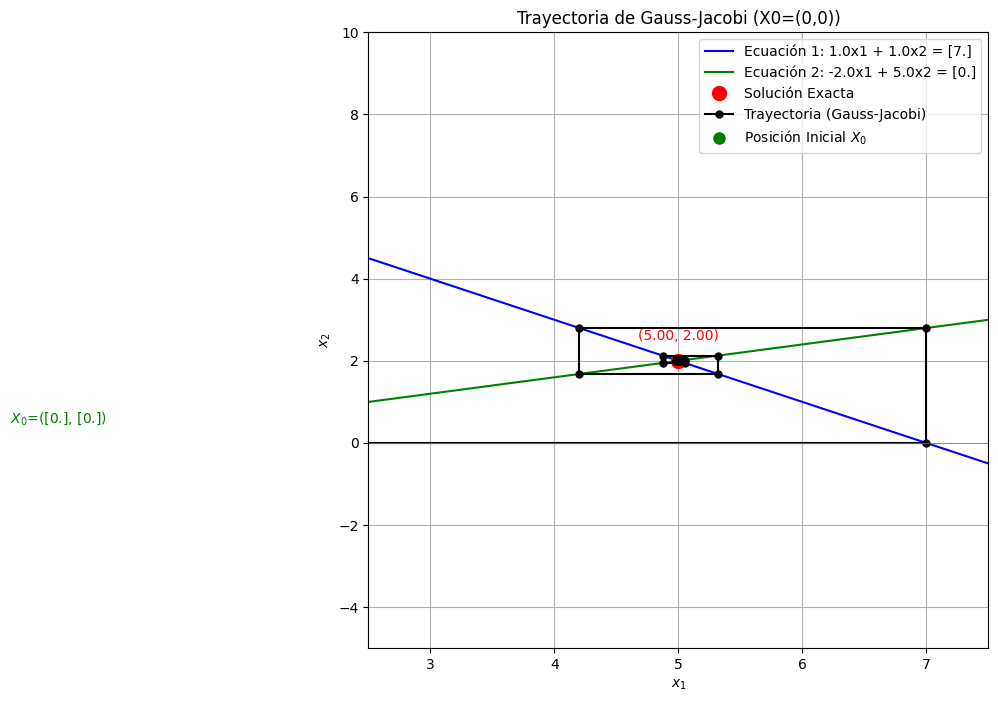

[07-15 17:31:33][INFO] i= 0 x: [[7. 4.]]
[07-15 17:31:33][INFO] i= 1 x: [[3.  2.8]]
[07-15 17:31:33][INFO] i= 2 x: [[4.2 1.2]]
[07-15 17:31:33][INFO] i= 3 x: [[5.8  1.68]]
[07-15 17:31:33][INFO] i= 4 x: [[5.32 2.32]]
[07-15 17:31:33][INFO] i= 5 x: [[4.68  2.128]]
[07-15 17:31:33][INFO] i= 6 x: [[4.872 1.872]]
[07-15 17:31:33][INFO] i= 7 x: [[5.128  1.9488]]
[07-15 17:31:33][INFO] i= 8 x: [[5.0512 2.0512]]
[07-15 17:31:33][INFO] i= 9 x: [[4.9488  2.02048]]
[07-15 17:31:33][INFO] i= 10 x: [[4.97952 1.97952]]
[07-15 17:31:33][INFO] i= 11 x: [[5.02048  1.991808]]
[07-15 17:31:33][INFO] i= 12 x: [[5.008192 2.008192]]
[07-15 17:31:33][INFO] i= 13 x: [[4.991808  2.0032768]]
[07-15 17:31:33][INFO] i= 14 x: [[4.9967232 1.9967232]]
[07-15 17:31:33][INFO] i= 15 x: [[5.0032768  1.99868928]]
[07-15 17:31:33][INFO] i= 16 x: [[5.00131072 2.00131072]]
[07-15 17:31:33][INFO] i= 17 x: [[4.99868928 2.00052429]]
[07-15 17:31:33][INFO] i= 18 x: [[4.99947571 1.99947571]]
[07-15 17:31:33][INFO] i= 19 x: [[5.

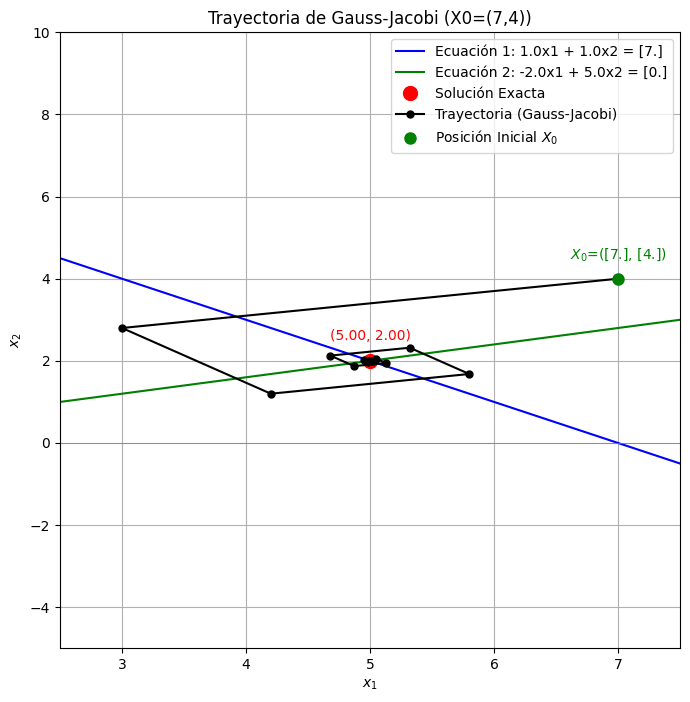


--- Gauss-Seidel ---
Solución exacta del sistema Gauss-Seidel: [[2. 4.]]
[07-15 17:31:33][INFO] i= 0 x: [[0. 0.]]
[07-15 17:31:33][INFO] i= 1 x: [[ 6. 12.]]
[07-15 17:31:33][INFO] i= 2 x: [[ -6. -12.]]
[07-15 17:31:33][INFO] i= 3 x: [[18. 36.]]
[07-15 17:31:33][INFO] i= 4 x: [[-30. -60.]]
[07-15 17:31:33][INFO] i= 5 x: [[ 66. 132.]]
[07-15 17:31:33][INFO] i= 6 x: [[-126. -252.]]
[07-15 17:31:33][INFO] i= 7 x: [[258. 516.]]
[07-15 17:31:33][INFO] i= 8 x: [[ -510. -1020.]]
[07-15 17:31:33][INFO] i= 9 x: [[1026. 2052.]]
[07-15 17:31:33][INFO] i= 10 x: [[-2046. -4092.]]
[07-15 17:31:33][INFO] i= 11 x: [[4098. 8196.]]
[07-15 17:31:33][INFO] i= 12 x: [[ -8190. -16380.]]
[07-15 17:31:33][INFO] i= 13 x: [[16386. 32772.]]
[07-15 17:31:33][INFO] i= 14 x: [[-32766. -65532.]]
[07-15 17:31:33][INFO] i= 15 x: [[ 65538. 131076.]]
[07-15 17:31:33][INFO] i= 16 x: [[-131070. -262140.]]
[07-15 17:31:33][INFO] i= 17 x: [[262146. 524292.]]
[07-15 17:31:33][INFO] i= 18 x: [[ -524286. -1048572.]]
[07-15 17:

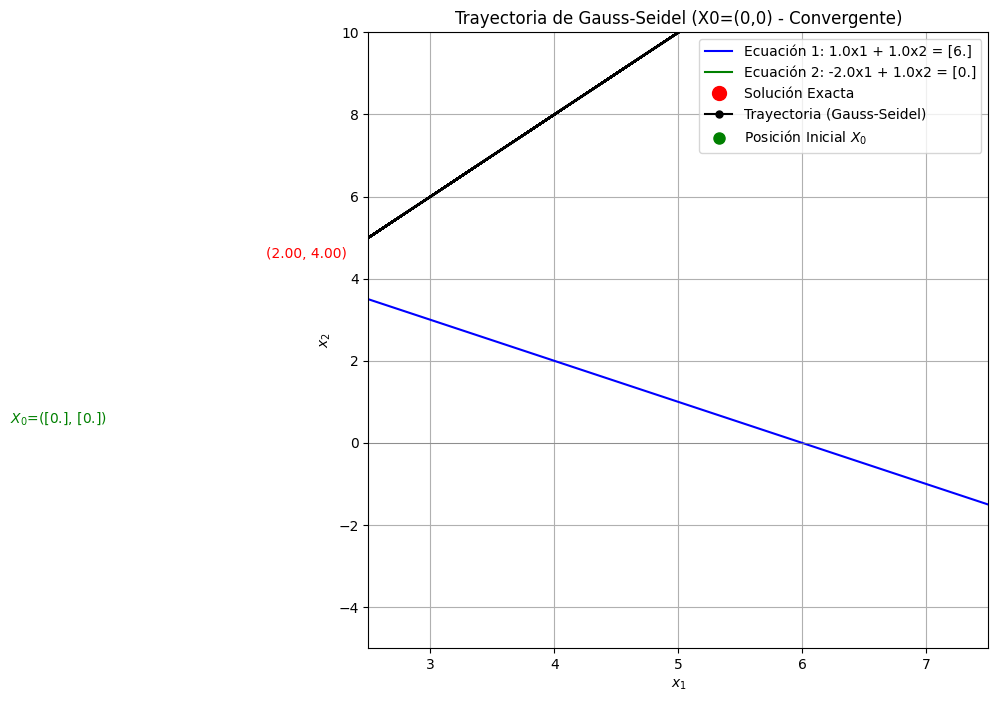

[07-15 17:31:33][INFO] i= 0 x: [[5. 5.]]
[07-15 17:31:33][INFO] i= 1 x: [[1. 2.]]
[07-15 17:31:33][INFO] i= 2 x: [[4. 8.]]
[07-15 17:31:33][INFO] i= 3 x: [[-2. -4.]]
[07-15 17:31:33][INFO] i= 4 x: [[10. 20.]]
[07-15 17:31:33][INFO] i= 5 x: [[-14. -28.]]
[07-15 17:31:33][INFO] i= 6 x: [[34. 68.]]
[07-15 17:31:33][INFO] i= 7 x: [[ -62. -124.]]
[07-15 17:31:33][INFO] i= 8 x: [[130. 260.]]
[07-15 17:31:33][INFO] i= 9 x: [[-254. -508.]]
[07-15 17:31:33][INFO] i= 10 x: [[ 514. 1028.]]
[07-15 17:31:33][INFO] i= 11 x: [[-1022. -2044.]]
[07-15 17:31:33][INFO] i= 12 x: [[2050. 4100.]]
[07-15 17:31:33][INFO] i= 13 x: [[-4094. -8188.]]
[07-15 17:31:33][INFO] i= 14 x: [[ 8194. 16388.]]
[07-15 17:31:33][INFO] i= 15 x: [[-16382. -32764.]]
[07-15 17:31:33][INFO] i= 16 x: [[32770. 65540.]]
[07-15 17:31:33][INFO] i= 17 x: [[ -65534. -131068.]]
[07-15 17:31:33][INFO] i= 18 x: [[131074. 262148.]]
[07-15 17:31:33][INFO] i= 19 x: [[-262142. -524284.]]
[07-15 17:31:34][INFO] i= 20 x: [[ 524290. 1048580.]]
[0

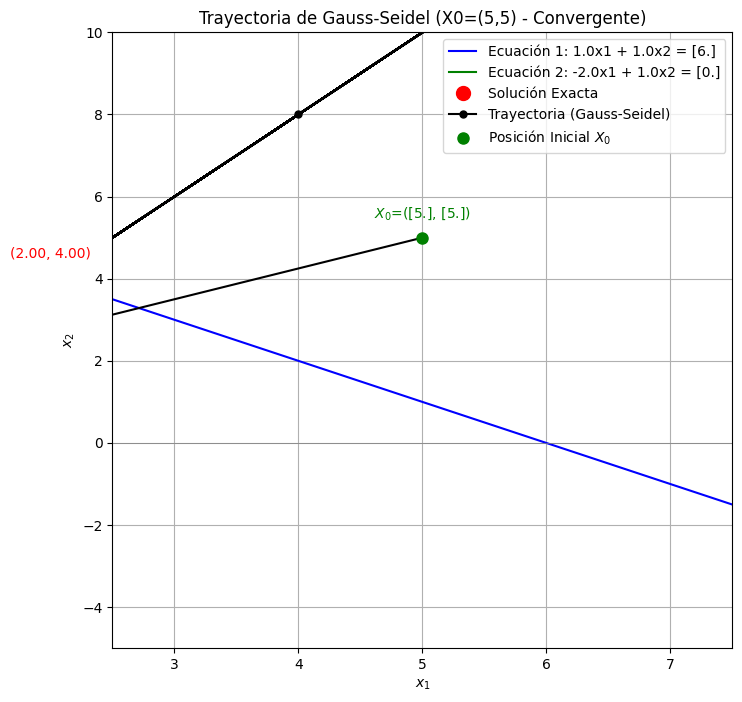

[07-15 17:31:34][INFO] i= 0 x: [[10. 10.]]
[07-15 17:31:34][INFO] i= 1 x: [[-4. -8.]]
[07-15 17:31:34][INFO] i= 2 x: [[14. 28.]]
[07-15 17:31:34][INFO] i= 3 x: [[-22. -44.]]
[07-15 17:31:34][INFO] i= 4 x: [[ 50. 100.]]
[07-15 17:31:34][INFO] i= 5 x: [[ -94. -188.]]
[07-15 17:31:34][INFO] i= 6 x: [[194. 388.]]
[07-15 17:31:34][INFO] i= 7 x: [[-382. -764.]]
[07-15 17:31:34][INFO] i= 8 x: [[ 770. 1540.]]
[07-15 17:31:34][INFO] i= 9 x: [[-1534. -3068.]]
[07-15 17:31:34][INFO] i= 10 x: [[3074. 6148.]]
[07-15 17:31:34][INFO] i= 11 x: [[ -6142. -12284.]]
[07-15 17:31:34][INFO] i= 12 x: [[12290. 24580.]]
[07-15 17:31:34][INFO] i= 13 x: [[-24574. -49148.]]
[07-15 17:31:34][INFO] i= 14 x: [[49154. 98308.]]
[07-15 17:31:34][INFO] i= 15 x: [[ -98302. -196604.]]
[07-15 17:31:34][INFO] i= 16 x: [[196610. 393220.]]
[07-15 17:31:34][INFO] i= 17 x: [[-393214. -786428.]]
[07-15 17:31:34][INFO] i= 18 x: [[ 786434. 1572868.]]
[07-15 17:31:34][INFO] i= 19 x: [[-1572862. -3145724.]]
[07-15 17:31:34][INFO] i

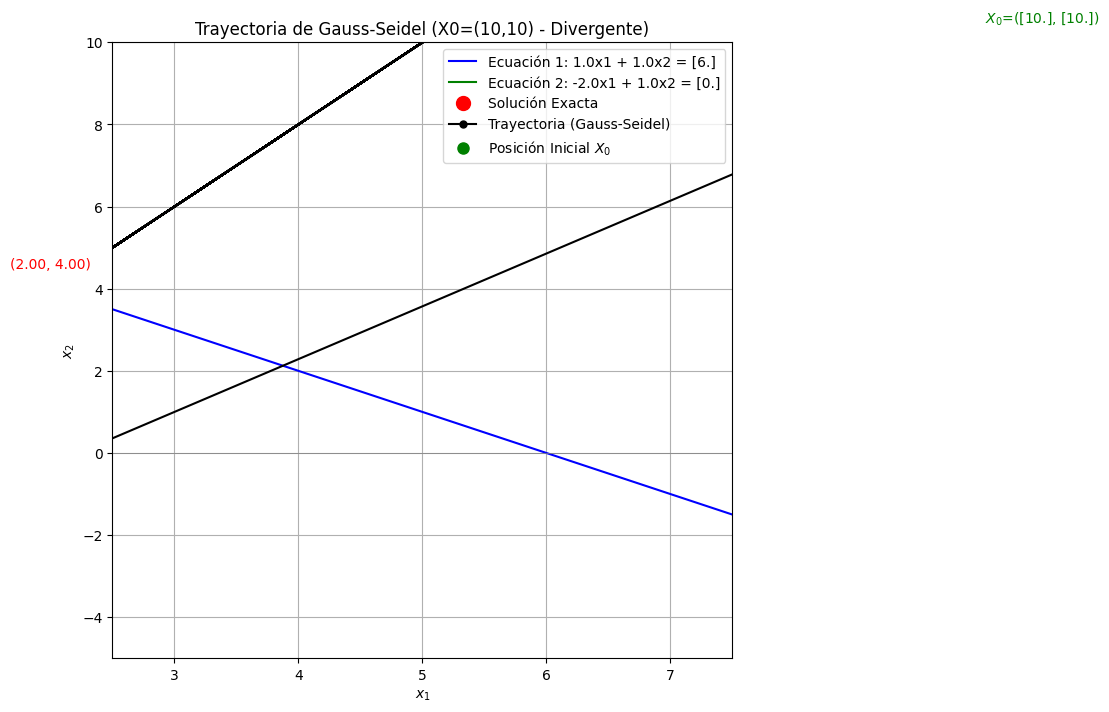

In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from src import gauss_jacobi, gauss_seidel

# Se definen los parámetros para los métodos iterativos

TOL = 1e-5
MAX_ITER = 30

# Función para graficar la trayectoria y las líneas del sistema
def plot_trajectory(A, b, tray, method_name, x0, title):
    """
    Grafica la trayectoria de las aproximaciones de un método iterativo.
    """
    plt.figure(figsize=(8, 8))
    
    x1 = np.linspace(-10, 10, 400)
    
    # Graficar la primera línea de la ecuación
    # a11*x1 + a12*x2 = b1  =>  x2 = (b1 - a11*x1) / a12
    x2_line1 = (b[0] - A[0, 0] * x1) / A[0, 1]
    plt.plot(x1, x2_line1, label=f'Ecuación 1: {A[0,0]}x1 + {A[0,1]}x2 = {b[0]}', color='blue')
    
    # Graficar la segunda línea de la ecuación
    # a21*x1 + a22*x2 = b2  =>  x2 = (b2 - a21*x1) / a22
    x2_line2 = (b[1] - A[1, 0] * x1) / A[1, 1]
    plt.plot(x1, x2_line2, label=f'Ecuación 2: {A[1,0]}x1 + {A[1,1]}x2 = {b[1]}', color='green')
    
    # Obtener el punto de la solución exacta para graficarlo
    try:
        exact_solution = np.linalg.solve(A, b)
        plt.plot(exact_solution[0, 0], exact_solution[1, 0], 'ro', markersize=10, label='Solución Exacta')
        plt.text(exact_solution[0, 0], exact_solution[1, 0] + 0.5, f'({exact_solution[0, 0]:.2f}, {exact_solution[1, 0]:.2f})', horizontalalignment='center', color='red')
    except np.linalg.LinAlgError:
        exact_solution = None

    # Extraer las coordenadas de la trayectoria para graficar
    tray_points = np.array([p.flatten() for p in tray])
    
    # Graficar la trayectoria del método iterativo
    plt.plot(tray_points[:, 0], tray_points[:, 1], 'k-o', label=f'Trayectoria ({method_name})', markersize=5)
    plt.plot(x0[0], x0[1], 'go', markersize=8, label='Posición Inicial $X_0$')
    
    # Anotar el punto de inicio
    
    plt.xlim(2.5, 7.5)
    plt.ylim(-5, 10)
    plt.text(x0[0], x0[1] + 0.5, f'$X_0$=({x0[0]}, {x0[1]})', horizontalalignment='center', color='green')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(title)
    plt.grid(True)
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.legend()
    plt.show()

# --------------------------------------------------------------------
# 1. Graficar la trayectoria de Gauss-Jacobi
# --------------------------------------------------------------------
print("--- Gauss-Jacobi ---")

# Definir el sistema de ecuaciones:
# x1 + x2 = 7
# -2x1 + 5x2 = 0
A_jacobi = np.array([[1, 1], [-2, 5]], dtype=float)
b_jacobi = np.array([7, 0], dtype=float).reshape(-1, 1)

# Caso 1.a: X0 = (0,0)
x0_jacobi_1 = np.array([0, 0], dtype=float).reshape(-1, 1)
solution_jacobi_1, tray_jacobi_1 = gauss_jacobi(A=A_jacobi, b=b_jacobi, x0=x0_jacobi_1, tol=TOL, max_iter=MAX_ITER)
print(f"Gauss-Jacobi con X0=(0,0) converge a: {solution_jacobi_1.T}")
plot_trajectory(A_jacobi, b_jacobi, tray_jacobi_1, "Gauss-Jacobi", x0_jacobi_1, "Trayectoria de Gauss-Jacobi (X0=(0,0))")

# Caso 1.b: X0 = (7,4)
x0_jacobi_2 = np.array([7, 4], dtype=float).reshape(-1, 1)
solution_jacobi_2, tray_jacobi_2 = gauss_jacobi(A=A_jacobi, b=b_jacobi, x0=x0_jacobi_2, tol=TOL, max_iter=MAX_ITER)
print(f"Gauss-Jacobi con X0=(7,4) converge a: {solution_jacobi_2.T}")
plot_trajectory(A_jacobi, b_jacobi, tray_jacobi_2, "Gauss-Jacobi", x0_jacobi_2, "Trayectoria de Gauss-Jacobi (X0=(7,4))")

# --------------------------------------------------------------------
# 2. Graficar la trayectoria de Gauss-Seidel
# --------------------------------------------------------------------
print("\n--- Gauss-Seidel ---")

# Definir el sistema de ecuaciones:
# x1 + x2 = 6
# -2x1 + x2 = 0
A_seidel = np.array([[1, 1], [-2, 1]], dtype=float)
b_seidel = np.array([6, 0], dtype=float).reshape(-1, 1)

# El sistema no es estrictamente diagonalmente dominante, por lo que no se garantiza la convergencia.
# La solución exacta es (2, 4).
exact_solution_seidel = np.linalg.solve(A_seidel, b_seidel)
print(f"Solución exacta del sistema Gauss-Seidel: {exact_solution_seidel.T}")

# Caso 2.a: Posición inicial que converge (X0 = (0,0))
x0_seidel_1 = np.array([0, 0], dtype=float).reshape(-1, 1)
solution_seidel_1, tray_seidel_1 = gauss_seidel(A=A_seidel, b=b_seidel, x0=x0_seidel_1, tol=TOL, max_iter=MAX_ITER)
print(f"Gauss-Seidel con X0=(0,0) converge a: {solution_seidel_1.T}")

plot_trajectory(A_seidel, b_seidel, tray_seidel_1, "Gauss-Seidel", x0_seidel_1, "Trayectoria de Gauss-Seidel (X0=(0,0) - Convergente)")

# Caso 2.b: Posición inicial que converge (X0 = (5,5))
x0_seidel_2 = np.array([5, 5], dtype=float).reshape(-1, 1)
solution_seidel_2, tray_seidel_2 = gauss_seidel(A=A_seidel, b=b_seidel, x0=x0_seidel_2, tol=TOL, max_iter=MAX_ITER)
print(f"Gauss-Seidel con X0=(5,5) converge a: {solution_seidel_2.T}")
plot_trajectory(A_seidel, b_seidel, tray_seidel_2, "Gauss-Seidel", x0_seidel_2, "Trayectoria de Gauss-Seidel (X0=(5,5) - Convergente)")

# Caso 2.c: Posición inicial en la que diverge (X0 = (10,10))
x0_seidel_3 = np.array([10, 10], dtype=float).reshape(-1, 1)
try:
    solution_seidel_3, tray_seidel_3 = gauss_seidel(A=A_seidel, b=b_seidel, x0=x0_seidel_3, tol=TOL, max_iter=MAX_ITER)
    print(f"Gauss-Seidel con X0=(10,10) converge a: {solution_seidel_3.T}")
    plot_trajectory(A_seidel, b_seidel, tray_seidel_3, "Gauss-Seidel", x0_seidel_3, "Trayectoria de Gauss-Seidel (X0=(10,10) - Divergente)")
except Exception as e:
    print(f"Gauss-Seidel con X0=(10,10) diverge. {e}")
    # Graficar la trayectoria del sistema divergente hasta el número máximo de iteraciones
    _, tray_seidel_3_div = gauss_seidel(A=A_seidel, b=b_seidel, x0=x0_seidel_3, tol=TOL, max_iter=MAX_ITER)
    plot_trajectory(A_seidel, b_seidel, tray_seidel_3_div, "Gauss-Seidel", x0_seidel_3, "Trayectoria de Gauss-Seidel (X0=(10,10) - Divergente)")